# 신경망구성

- layer : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력 받아 하나 이상의 텐서를 출력
- module : 한 개 이상의 계층이 모여서 구성
- model : 한 개 이상의 모듈이 모여서 구성

In [1]:
# torch.nn package
# 주로 가중치, 편향 값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용.

import torch.nn as nn

In [6]:
# nn.Linear
import torch
input = torch.rand(128, 20) # feature 수는 20개
print(input)

# 여기도 input 개수 20개. output 개수 30개
m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[0.2016, 0.6769, 0.7252,  ..., 0.7606, 0.1467, 0.9992],
        [0.7224, 0.8637, 0.9042,  ..., 0.8792, 0.0336, 0.7753],
        [0.1594, 0.6128, 0.2607,  ..., 0.0388, 0.3601, 0.8376],
        ...,
        [0.0469, 0.0461, 0.1009,  ..., 0.5067, 0.7658, 0.7749],
        [0.4512, 0.1119, 0.3938,  ..., 0.7400, 0.3659, 0.8746],
        [0.2684, 0.1405, 0.3457,  ..., 0.7683, 0.2011, 0.5702]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.1895,  0.8258, -0.1270,  ...,  0.3022,  0.1622,  0.3376],
        [-0.1755,  1.0050, -0.2386,  ...,  0.5294,  0.3561, -0.0280],
        [-0.3438,  0.5907, -0.1918,  ...,  0.4968,  0.3639,  0.0985],
        ...,
        [-0.4709,  0.4799, -0.0837,  ...,  0.6211,  0.3776,  0.3343],
        [-0.3355,  0.5649, -0.2858,  ...,  0.4373,  0.2706,  0.2078],
        [-0.3010,  0.6535, -0.0968,  ...,  0.2381,  0.5156,  0.2695]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [7]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [12]:
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1), padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [15]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


# Convolution Layers

- in_channels : channel의 개수
- out_channels : 출력 channel의 개수
- kernel_size : 커널(필터) 사이즈

In [16]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [20]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu')) # Conv layer 층을 cpu로 전송.
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [33]:
# weight 확인
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [34]:
# weight는 detach()를 통해 꺼내줘야 numpy() 변환 가능
import numpy as np
weight = weight.detach()

In [35]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

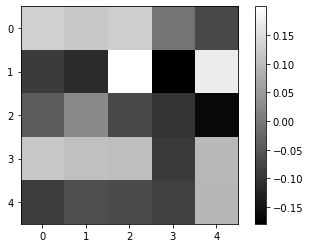

In [39]:
import matplotlib.pyplot as plt
plt.imshow(weight[0,0,:,:],'gray')
plt.colorbar()
plt.show()